In [1]:
%pylab inline
import pyccl as ccl
k = np.logspace(-4, 1, 512,endpoint=False)

def get_pk(params):
    """ Computes the power spectrum 
    """
    cosmo_bbks = ccl.Cosmology(
        Omega_c=params[0], 
        sigma8=params[1],
        Omega_b=params[2],
        h=params[3],
        n_s=params[4],
        Neff=0,
        transfer_function='bbks', matter_power_spectrum='linear',
        Omega_k=0, T_CMB=2.7, m_nu=0.0, m_nu_type='normal'
        )
    cosmo_camb = ccl.Cosmology(
        Omega_c=params[0], 
        sigma8=params[1],
        Omega_b=params[2],
        h=params[3],
        n_s=params[4],
        Neff=0,
        transfer_function='boltzmann_camb', matter_power_spectrum='linear',
        Omega_k=0, T_CMB=2.7, m_nu=0.0, m_nu_type='normal'
        )    

    pk_bbks = ccl.linear_matter_power(cosmo_bbks, k, 1.0)
    pk_camb = ccl.linear_matter_power(cosmo_camb, k, 1.0)
    
    return pk_bbks, pk_camb

Populating the interactive namespace from numpy and matplotlib


In [2]:
fid_cosmo = np.array([0.25, 0.8,  0.05, 0.7, 0.96])

In [3]:
def get_params(batch_size):
    om = np.random.uniform(0.1,0.9, batch_size)
    s8 = np.random.uniform(0.4,1.0, batch_size)
    ob = np.random.uniform(0.03,0.07, batch_size)
    ns = np.random.uniform(0.87,0.97, batch_size)
    h = np.random.uniform(0.55,0.9, batch_size)
    p = np.stack([om,s8,ob,h,ns],axis=1)
    return p

In [4]:
batch_params = get_params(512)

In [5]:
batch_params.shape

(512, 5)

In [6]:
from multiprocessing import Pool
from astropy.io import fits

In [7]:
p = Pool(8)

In [ ]:
for i in range(100):
    batch_params = get_params(1024)
    batch_pk = p.map(get_pk, list(batch_params))
    
    fits.writeto('/data2/camb/params_%03d.fits'%i, batch_params, overwrite=True)
    fits.writeto('/data2/camb/data_%03d.fits'%i, np.stack(batch_pk,axis=0), overwrite=True)
    print("Iter",i)

Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Iter 23
Iter 24
Iter 25
Iter 26
Iter 27
Iter 28
Iter 29
Iter 30
Iter 31
Iter 32
Iter 33
Iter 34
Iter 35
Iter 36
Iter 37
Iter 38
Iter 39
Iter 40
Iter 41
Iter 42
Iter 43
Iter 44
Iter 45
Iter 46
Iter 47
Iter 48
Iter 49
Iter 50
Iter 51
Iter 52
Iter 53
Iter 54
Iter 55
Iter 56
Iter 57
Iter 58
Iter 59
Iter 60
Iter 61
Iter 62
Iter 63
Iter 64


In [9]:
from astropy.io import fits

In [8]:
res = fits.getdata('/data2/camb/data_001.fits')

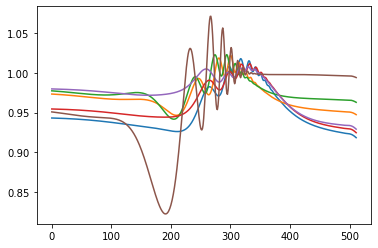

In [14]:
plot(res[0,1]/res[0,2])
plot(res[1,1]/res[1,2])
plot(res[2,1]/res[2,2])
plot(res[3,1]/res[3,2])
plot(res[4,1]/res[4,2])
plot(res[5,1]/res[5,2])